In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [9]:
data_row_count, data_column_count = data.shape
print('Row Count:', data_row_count)
print('Column Count:', data_column_count)
data.info()

Row Count: 5110
Column Count: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [12]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
data.id.nunique()

5110

In [14]:
data = data.drop(columns ='id')
data.shape

(5110, 11)

In [15]:
data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [16]:
data['gender'] = data['gender'].replace('Other', list(data.gender.mode().values)[0])
data.gender.value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

In [17]:
df_cat = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']

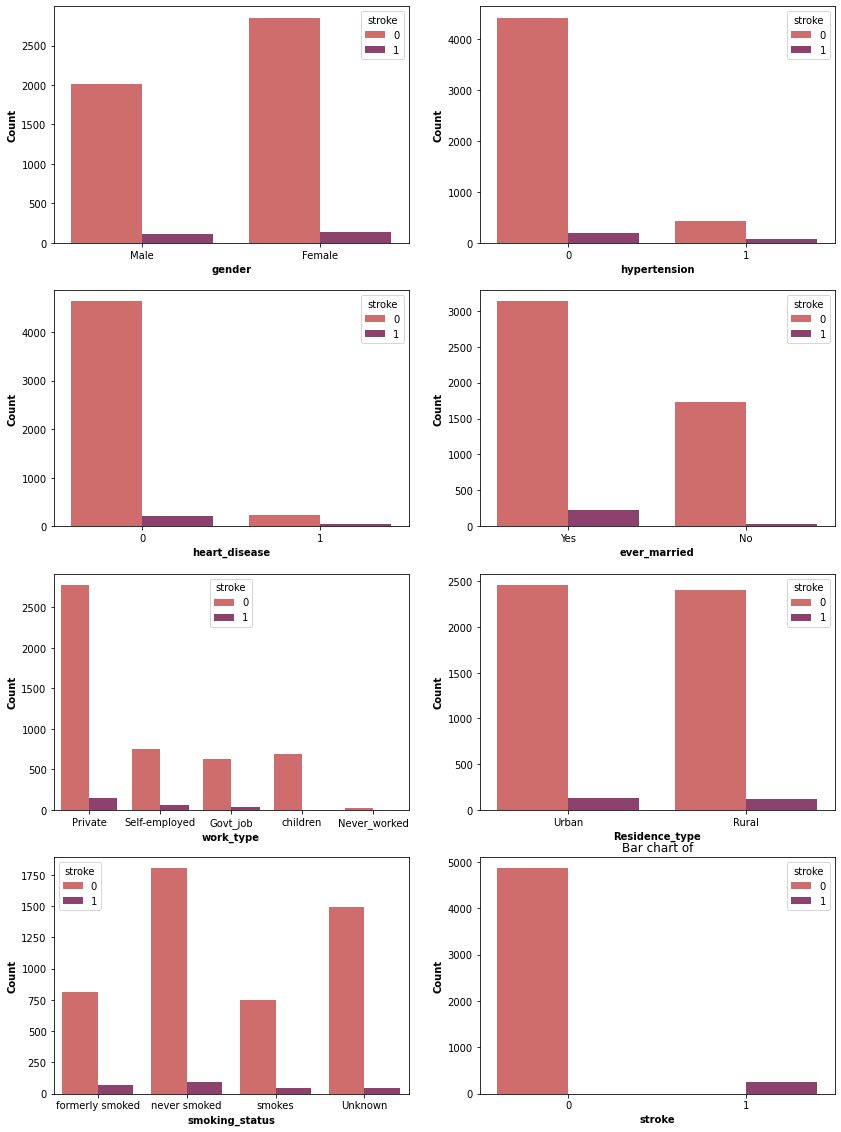

In [18]:
fig, axs = plt.subplots(4, 2, figsize=(14,20))
axs = axs.flatten()

# iterate through each column of df_catd and plot
for i, col_name in enumerate(df_cat):
    sns.countplot(x=col_name, data=data, ax=axs[i], hue =data['stroke'], palette = 'flare')
    plt.title("Bar chart of")
    axs[i].set_xlabel(f"{col_name}", weight = 'bold')
    axs[i].set_ylabel('Count', weight='bold')

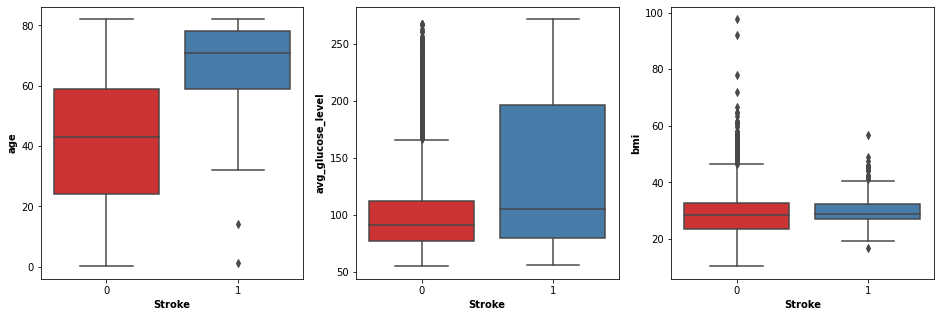

In [19]:
df_num = ['age', 'avg_glucose_level', 'bmi']

fig, axs = plt.subplots(1, 3, figsize=(16,5))
axs = axs.flatten()

# iterate through each column in df_num and plot
for i, col_name in enumerate(df_num):
    sns.boxplot(x="stroke", y=col_name, data=data, ax=axs[i],  palette = 'Set1')
    axs[i].set_xlabel("Stroke", weight = 'bold')
    axs[i].set_ylabel(f"{col_name}", weight='bold')

In [20]:
bmi_outliers=data.loc[data['bmi']>50]
bmi_outliers['bmi'].shape

(79,)

In [21]:
data["bmi"] = pd.to_numeric(data["bmi"])
data["bmi"] = data["bmi"].apply(lambda x: 50 if x>50 else x)

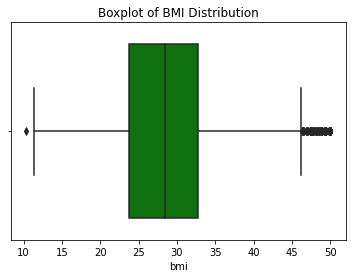

In [22]:
sns.boxplot(data=data,x=data["bmi"],color='green')
plt.title("Boxplot of BMI Distribution");

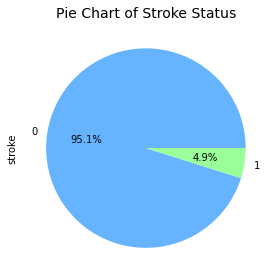

In [23]:
plt.figure(figsize=(4,4))
data['stroke'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['#66b3ff','#99ff99'])
plt.title("Pie Chart of Stroke Status", fontdict={'fontsize': 14})
plt.tight_layout()

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

df_en = data
df_en.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


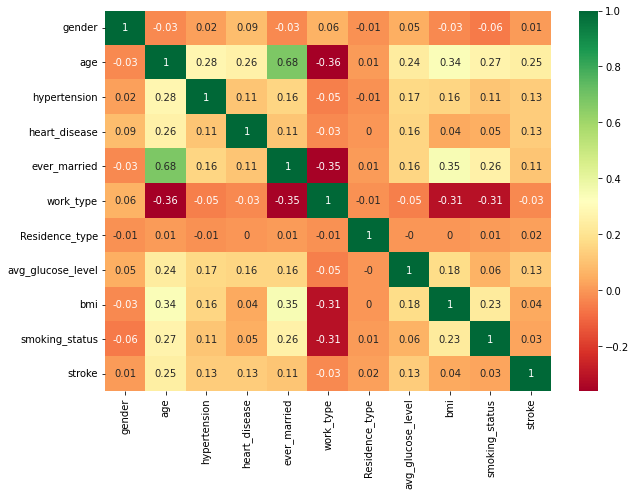

In [25]:
corr = df_en.corr().round(2)
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True, cmap = 'RdYlGn');

In [26]:
df_en = df_en.drop(['ever_married'], axis = 1)
df_en.head(3)

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,2,0,105.92,32.500000,2,1


In [27]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
columns = ['avg_glucose_level','bmi','age']
stand_scaled = s.fit_transform(df_en[['avg_glucose_level','bmi','age']])
stand_scaled = pd.DataFrame(stand_scaled,columns=columns)

df_en=df_en.drop(columns=columns,axis=1)
stand_scaled.head()

,avg_glucose_level,bmi,age
0,2.706375,1.066746,1.051434
1,2.121559,0.013363,0.786070
2,-0.005028,0.506346,1.626390
3,1.437358,0.766044,0.255342
4,1.501184,-0.655458,1.582163


In [28]:
df = pd.concat([df_en, stand_scaled], axis=1)
df.head(3)

,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke,avg_glucose_level,bmi,age
0,1,0,1,2,1,1,1,2.706375,1.066746,1.051434
1,0,0,0,3,0,2,1,2.121559,0.013363,0.786070
2,1,0,1,2,0,2,1,-0.005028,0.506346,1.626390


In [29]:
x=df.drop(['stroke'], axis=1)
y=df['stroke']
# Models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 124)

In [31]:
models = dict()
models['Decision Tree'] = DecisionTreeClassifier()
models['Logreg'] = LogisticRegression()
models['Random Forest'] = RandomForestClassifier()
models['Support Vector Machine'] = SVC(kernel = 'sigmoid', gamma='scale')
models['kNN'] = KNeighborsClassifier()
models['Naive Bayes'] = GaussianNB()
models['KMeans'] = KMeans(n_clusters=2, n_init=10, random_state=42)
for model in models:
    
    models[model].fit(x_train, y_train)
    print(model + " model fitting completed.")

Decision Tree model fitting completed.
Logreg model fitting completed.
Random Forest model fitting completed.
Support Vector Machine model fitting completed.
kNN model fitting completed.
Naive Bayes model fitting completed.
KMeans model fitting completed.


In [32]:
print("Test Set Prediction:\n")

for x in models:

    print('-'*20+x+'-'*20)
    model = models[x]
    y_pred = model.predict(x_test)
    arg_test = {'y_true':y_test, 'y_pred':y_pred}
    print(confusion_matrix(**arg_test))
    print(classification_report(**arg_test))

Test Set Prediction:

--------------------Decision Tree--------------------
[[1396   68]
 [  62    7]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1464
           1       0.09      0.10      0.10        69

    accuracy                           0.92      1533
   macro avg       0.53      0.53      0.53      1533
weighted avg       0.92      0.92      0.92      1533

--------------------Logreg--------------------
[[1464    0]
 [  69    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1464
           1       0.00      0.00      0.00        69

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533

--------------------Random Forest--------------------
[[1461    3]
 [  69    0]]
              precision    recall  f1-score   support

           0       0.95      1.00

In [33]:
print('Summary of Accuracy Score\n\n')
for i in models:
    model = models[i]
    print(i + ' Model: ',accuracy_score(y_test, model.predict(x_test)).round(4))

Summary of Accuracy Score


Decision Tree Model:  0.9152
Logreg Model:  0.955
Random Forest Model:  0.953
Support Vector Machine Model:  0.9243
kNN Model:  0.9524
Naive Bayes Model:  0.8728
KMeans Model:  0.7834
